### I. Temat **"Analiza związku między miejscem zamieszkania kierowcy, a prawdopodobieństwem udziału w wypadku drogowym."**

1.1 **Cel pracy:**  
  - Zbadanie, czy istnieje związek między miejscem zamieszkania kierowcy (wiejskim lub miejskim), a prawdopodobieństwem jego udziału w wypadku drogowym oraz identyfikacja kluczowych czynników wpływających na przewidywanie lokalizacji wypadku na terenie wiejskim, z wykorzystaniem modeli uczenia maszynowego.
  
1.2 **Pytania badawcze:**  
  - Czy miejsce zamieszkania kierowcy (miejskie vs. niemiejskie) wpływa na prawdopodobieństwo udziału w wypadku drogowym?
  - Jakie z wybranych cech kontekstowych (np. typ drogi, warunki oświetleniowe, kontrola skrzyżowań) mają największy wpływ na prawdopodobieństwo wystąpienia wypadku na terenie wiejskim?
  - Czy modele uczenia maszynowego (XGBoost, RandomForest) mogą skutecznie przewidzieć lokalizację wypadku na podstawie miejsca zamieszkania kierowcy i cech kontekstowych?

1.3 **Hipoteza badawcza:**  
  - Kierowcy z obszarów miejskich są bardziej narażeni na udział w wypadkach drogowych na terenach wiejskich niż kierowcy z obszarów wiejskich.
  - Specyficzne cechy, takie jak drogi jednopasmowe, brak oświetlenia ulicznego oraz niekontrolowane skrzyżowania, znacząco zwiększają ryzyko wypadku na terenie wiejskim.
  - Modele uczenia maszynowego (XGBoost, RandomForest) nie osiągają wysokiej skuteczności w przewidywaniu lokalizacji wypadku (wiejskiej vs. miejskiej) na podstawie miejsca zamieszkania kierowcy i cech kontekstowych.

### II. Dane i metodyka 
1. **Źródła danych**:  
   - Dane pochodzą z oficjalnych brytyjskich baz danych (Department for Transport - data.gov.uk) dotyczących wypadków drogowych z lat 2021-2023 na terenie UK.
   - Tabele (`casualties`, `vehicles`, `accidents`) zawierające dane m.in. o ofiarach (wiek, miejsce zamieszkania), informacje o pojazdach i kierowcach (np. obszar zamieszkania, odległość od miejsca wypadku) i kontekst wypadków (warunki pogodowe, typ drogi) zostały połączone w tabelę `data` po kluczu `accident_index`.
   - Statystyki dotyczą wyłącznie wypadków z obrażeniami ciała na drogach publicznych, które są zgłaszane policji, a następnie rejestrowane przy użyciu formularza zgłaszania kolizji `STATS19`.
   - **Przewodnik**: po statystykach dotyczących wypadków drogowych: https://www.gov.uk/guidance/road-accident-and-safety-statistics-guidance
   - **Zestawy danych** do pobrania: https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-accidents-safety-data

1. **Opis użytych zmiennych**: 
   
   W analizie wykorzystano następujące zmienne, które opisują okoliczności wypadków drogowych, charakterystyki kierowców, pojazdów oraz poszkodowanych:

   - **`road_type`** – Rodzaj drogi, na której doszło do wypadku. Kategorie obejmują: rondo (1), ulica jednokierunkowa (2), droga dwujezdniowa (3), droga jednojezdniowa (6), droga dojazdowa (7), nieznana (9), ulica jednokierunkowa/droga dojazdowa (12) lub brak danych (-1).

   - **`light_conditions`** – Warunki oświetlenia w czasie wypadku. Kategorie: światło dzienne (1), ciemność z działającym oświetleniem (4), ciemność z niedziałającym oświetleniem (5), ciemność bez oświetlenia (6), ciemność z nieznanym stanem oświetlenia (7) lub brak danych (-1).

   - **`junction_detail`** – Szczegóły dotyczące skrzyżowania w miejscu wypadku. Obejmuje: brak skrzyżowania w promieniu 20 metrów (0), rondo (1), mini-rondo (2), skrzyżowanie typu T lub rozwidlenie (3), droga dojazdowa (5), skrzyżowanie czteroramienne (6), skrzyżowanie z więcej niż 4 ramionami (7), prywatny wjazd (8), inne skrzyżowanie (9), nieznane (99) lub brak danych (-1).

   - **`junction_control`** – Rodzaj kontroli ruchu na skrzyżowaniu. Kategorie: brak skrzyżowania w promieniu 20 metrów (0), osoba upoważniona (1), sygnalizacja świetlna (2), znak stopu (3), ustąp pierwszeństwa lub brak kontroli (4), nieznane (9) lub brak danych (-1).

   - **`driver_home_area_type`** – Typ obszaru zamieszkania kierowcy. Obejmuje: obszar miejski (1), małe miasto (2), obszar wiejski (3) lub brak danych (-1).

   - **`accident_year`** – Rok, w którym doszło do wypadku.

   - **`age_of_casualty`** – Wiek osoby poszkodowanej w wypadku. Wartość -1 oznacza brak danych.

   - **`driver_distance_banding`** – Odległość miejsca wypadku od miejsca zamieszkania kierowcy. Kategorie: do 5 km (1), 5,001–10 km (2), 10,001–20 km (3), 20,001–100 km (4), powyżej 100 km (5) lub brak danych (-1).

   - **`weather_conditions`** – Warunki pogodowe w czasie wypadku. Kategorie: dobra pogoda bez silnego wiatru (1), deszcz bez silnego wiatru (2), śnieg bez silnego wiatru (3), dobra pogoda z silnym wiatrem (4), deszcz z silnym wiatrem (5), śnieg z silnym wiatrem (6), mgła (7), inne (8), nieznane (9) lub brak danych (-1).

   - **`urban_or_rural_area`** – Typ obszaru, w którym doszło do wypadku: miejski (1), wiejski (2), nieprzypisany (3) lub brak danych (-1).

   - **`casualty_type`** – Typ poszkodowanego w wypadku, np.: pieszy (0), rowerzysta (1), motocyklista (2–5, 23, 97, 103–106), pasażer 
   taksówki (8), pasażer samochodu (9), pasażer busa (10–11), jeździec konny (16), inne typy pojazdów (17–21, 90, 98–99, 108–110, 113) lub brak danych (-1).

   - **`speed_limit`** – Ograniczenie prędkości na drodze w miejscu wypadku. Wartości w milach na godzinę, np. 30, 60; 99 oznacza nieznane (zgłoszone przez uczestnika), a -1 brak danych.

   - **`driver_imd_decile`** – Poziom deprywacji społeczno-ekonomicznej kierowcy według indeksu IMD (ang. Index of Multiple Deprivation). Skala od 1 (najbardziej deprywowany 10%) do 10 (najmniej deprywowany 10%) lub brak danych (-1).

   - **`age_of_vehicle`** – Wiek pojazdu w latach w momencie wypadku. Wartość -1 oznacza brak danych.

   - **`age_of_driver`** – Wiek kierowcy w momencie wypadku. Wartość -1 oznacza brak danych.

   - **`number_of_casualties`** – Liczba osób poszkodowanych w wyniku wypadku.

   - **`skidding_and_overturning`** – Informacja o poślizgu lub przewróceniu pojazdu. Kategorie: brak (0), poślizg (1), poślizg i przewrócenie (2), wyłamanie (3), wyłamanie i przewrócenie (4), przewrócenie (5), nieznane (9) lub brak danych (-1).

3. **Opis Przygotowanie danych:**

   -  **Oczyszczono dane:** Zastąpiono `-1` i `99` na `NaN`, a następnie usunięto wiersze z brakami w tych kolumnach.
   -  **Przekształcono czas:** Z kolumny `time` utworzono `hour_of_day`.
   -  **Przygotowanie zmiennej docelowej:** dla `driver_home_area_type` zsumowano wartości 2 i 3 (small town oraz unrual) w jedną etykietę nr 2 dla przejrzystości danych
   -  **Tworzenie zmiennych binarnych:** 
         - is_urban_driver: Kierowca pochodzi z obszaru miejskiego (`driver_home_area_type` = 1).
         - is_rural_accident: Wypadek miał miejsce na terenie wiejskim (`urban_or_rural_area` = 2).
   -  **Znormalizowano prędkość:** `speed_limit` przekształcono w `speed_limit_normalized`.
   -  **Zbindowano wiek:** `age_of_casualty` i `age_of_driver` przekształcono w `age_of_casualty_binned` i `age_of_driver_binned`.
         - Zarówno age_of_casualty jak i age_of_driver podzielono na 5 przedziałów:
         - ≤17 lat, 18-25 lat, 26-40 lat, 41-60 lat, >60 lat.
   -  **Stworzono nowe cechy:**
      * `urban_driver_speed` jako iloczyn `is_urban_driver` i `speed_limit_normalized`.
      * `is_rush_hour` na podstawie `hour_of_day`.
      * `distance_speed_interaction` jako iloczyn `driver_distance_banding` i `urban_driver_speed`.
   -  **Wybrano cechy:** Ustalono listę `selected_features`, która teraz zawiera również `casualty_type`.
   -  **Zakodowano kategorie:** Zmienne kategorialne z `selected_features` (w tym nowa kolumna `casualty_type` oraz `road_type`, `light_conditions`, `junction_detail`, `junction_control`, `age_of_casualty_binned`, `driver_distance_banding`, `weather_conditions`, `age_of_driver_binned`, `skidding_and_overturning`) zakodowano zero-jedynkowo.
   -  **Stworzono dodatkowe cechy po kodowaniu:**
      * `important_driver_distance` na podstawie `driver_distance_banding_4.0` i `driver_distance_banding_3.0`.
      * `urban_driver_long_distance` jako iloczyn `is_urban_driver` i `important_driver_distance`.
      * `urban_driver_no_junction_control` jako iloczyn `is_urban_driver` i `junction_control_4.0` (jeśli istnieje).
   -  **Podział danych: Dane podzielono na zbiory:**
      * Treningowy + walidacyjny (80%) i testowy (20%) z zachowaniem stratyfikacji..
      * Następnie zbiór treningowy + walidacyjny podzielono na treningowy (60% całości) i walidacyjny (20% całości), również ze stratyfikacją.
   -  **Balansowanie danych:**
      * Zastosowano SMOTE na zbiorze treningowym, aby zrównoważyć klasy zmiennej docelowej `is_rural_accident`.
   -  **Rozmiary zbiorów danych po przetworzeniu:**
      * Zbiór treningowy (po SMOTE): 228388 rekordów / Zbiór walidacyjny: 54611 rekordów / Zbiór testowy: 54611 rekordów.

4. **Format kodu oraz wersje bibliotek:**

      Kod został wykonany w Pythonie z użyciem następujących bibliotek i ich wersji:

      - **NumPy**: 1.26.4  
      - **Pandas**: 2.2.3  
      - **Matplotlib**: 3.9.2  
      - **Plotly**: 5.24.1  
      - **Scikit-learn**: 1.5.1  
      - **Tabulate**: 0.9.0  
      - **Imbalanced-learn (SMOTE)**: 0.12.3  
      - **XGBoost**: 2.1.4  
      - **SciPy**: 1.13.1
   
   Celem było przygotowanie danych (X) i zmiennej docelowej (y, czyli `is_rural_accident`) do modelowania poprzez oczyszczenie, transformację i stworzenie nowych cech, uwzględniając teraz również typ uczestnika wypadku (`casualty_type`).

In [6]:
# Standardowe biblioteki
import numpy as np
import pandas as pd

# Biblioteki do wizualizacji danych
import matplotlib.pyplot as plt
import plotly.express as px
from tabulate import tabulate

# Biblioteki do modelowania i uczenia maszynowego (scikit-learn)
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler

# Biblioteki do zbalansowania danych
from imblearn.over_sampling import SMOTE

# Biblioteki do uczenia maszynowego (inne)
from scipy.stats import chi2_contingency
from xgboost import XGBClassifier


# # Wczytanie danych / # Linki do plików CSV
casualties_url = 'https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-casualty-last-5-years.csv'
vehicles_url = 'https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-vehicle-last-5-years.csv'
accidents_url = 'https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-collision-last-5-years.csv'

# Wczytanie danych bezpośrednio z linków
casualties = pd.read_csv(casualties_url, low_memory=False)
vehicles = pd.read_csv(vehicles_url, low_memory=False)
accidents = pd.read_csv(accidents_url, low_memory=False)

# Połączenie tabel
data = accidents.merge(casualties, on='accident_index', how='left').merge(vehicles, on='accident_index', how='left')
# Filtracja danych dla lat 2021-2023
data = data[data['accident_year'].isin([2021, 2022, 2023])]

In [7]:
# Przygotowanie danych
columns_to_check_NaN = [
    'road_type', 'light_conditions', 'junction_detail', 'junction_control', 'driver_home_area_type', 'accident_year',
    'age_of_casualty', 'driver_distance_banding', 'weather_conditions', 'urban_or_rural_area', 'casualty_type',
    'speed_limit', 'driver_imd_decile', 'age_of_vehicle', 'age_of_driver', 'number_of_casualties', 'skidding_and_overturning'
]
data[columns_to_check_NaN] = data[columns_to_check_NaN].replace([-1, 99], np.nan)
data.dropna(subset=columns_to_check_NaN, inplace=True)

# Wyodrębnienie godziny z czasu
data['hour_of_day'] = pd.to_datetime(data['time'], format='%H:%M').dt.hour

# Definicja zmiennych
# Kierowcy z obszarów miejskich: driver_home_area_type = 1 (miejskie)
data['driver_home_area_type'] = data['driver_home_area_type'].replace({3: 2})
data['is_urban_driver'] = (data['driver_home_area_type'] == 1).astype(int)

# Wypadki na terenach wiejskich: urban_or_rural_area = 2 (wiejskie)
data['is_rural_accident'] = (data['urban_or_rural_area'] == 2).astype(int)

# Normalizacja speed_limit
scaler = StandardScaler()
data['speed_limit_normalized'] = scaler.fit_transform(data[['speed_limit']])

# Binowanie age_of_casualty
data['age_of_casualty'] = pd.to_numeric(data['age_of_casualty'], errors='coerce')
bins_age_driver = [-float('inf'), 17, 25, 40, 60, float('inf')]
labels_age_driver = ['1', '2', '3', '4', '5']
data['age_of_casualty_binned'] = pd.cut(data['age_of_casualty'], bins=bins_age_driver, labels=labels_age_driver, right=False)

# Binowanie age_of_driver
data['age_of_driver'] = pd.to_numeric(data['age_of_driver'], errors='coerce')
bins_age_driver = [-float('inf'), 17, 25, 40, 60, float('inf')]
labels_age_driver = ['1', '2', '3', '4', '5']
data['age_of_driver_binned'] = pd.cut(data['age_of_driver'], bins=bins_age_driver, labels=labels_age_driver, right=False)

# Inżyniera Cech / feature engineering
data['urban_driver_speed'] = data['is_urban_driver'] * data['speed_limit_normalized']
data['is_rush_hour'] = data['hour_of_day'].apply(lambda h: 1 if (7 <= h <= 9) or (15 <= h <= 18) else 0)
data['distance_speed_interaction'] = data['driver_distance_banding'].astype(float) * data['urban_driver_speed']

# Wybór cech do modelu
selected_features = [
    'is_urban_driver', 'road_type', 'light_conditions', 'junction_detail', 'junction_control',
    'driver_distance_banding', 'weather_conditions', 'is_rush_hour', 'age_of_driver_binned', 'age_of_casualty_binned',
    'distance_speed_interaction', 'speed_limit_normalized', 'driver_imd_decile', 
    'hour_of_day', 'number_of_casualties', 'urban_driver_speed', 'skidding_and_overturning', 'casualty_type'
]

# Przygotowanie danych: kodowanie kategorialne
X = data[selected_features]
X = pd.get_dummies(X, columns=['road_type', 'light_conditions', 'junction_detail', 'junction_control',
                               'age_of_casualty_binned', 'driver_distance_banding', 'is_rush_hour', 
                               'weather_conditions', 'age_of_driver_binned', 'skidding_and_overturning', 'casualty_type'
                               ], drop_first=True)
y = data['is_rural_accident']

#Inżynieria cech po dummies
X['important_driver_distance'] = (X['driver_distance_banding_4.0'] + X['driver_distance_banding_3.0'] > 0).astype(int)
X['urban_driver_long_distance'] = X['is_urban_driver'] * X['important_driver_distance']

     # Przykład dla junction_control_4.0 (np. brak kontroli ruchu)
if 'junction_control_4.0' in X.columns:
    X['urban_driver_no_junction_control'] = X['is_urban_driver'] * X['junction_control_4.0']

# Podział na zbiór treningowy + walidacyjny (80%) i testowy (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Podział X_temp na zbiór treningowy (60% z całości) i walidacyjny (20% z całości)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Oversampling klasy mniejszościowej (SMOTE)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Sprawdzenie rozmiarów zbiorów
print(f"\nRozmiary zbiorów po SMOTE:")
print(f"Zbiór treningowy: {X_train.shape[0]} rekordów")
print(f"Zbiór walidacyjny: {X_val.shape[0]} rekordów")
print(f"Zbiór testowy: {X_test.shape[0]} rekordów")


Rozmiary zbiorów po SMOTE:
Zbiór treningowy: 228388 rekordów
Zbiór walidacyjny: 54611 rekordów
Zbiór testowy: 54611 rekordów



Tabela1: Proporcje kierowców według miejsca zamieszkania:
+----+---------------+--------------------+-----------+
|    | Pochodzenie   |   Liczba kierowców | Procent   |
+====+===============+====================+===========+
|  0 | kier. Miejski |             222719 | 81.6%     |
+----+---------------+--------------------+-----------+
|  1 | kier. Wiejski |              50334 | 18.4%     |
+----+---------------+--------------------+-----------+
|  2 | Suma          |             273053 | 100.0%    |
+----+---------------+--------------------+-----------+


Tabela2: Rozkład kierowców według miejsca zamieszkania w poszczególnych latach:
+------+-------+-----------------+---------------------+-----------------+---------------------+--------+
|      |   Rok |   kier. Wiejski | % kier. Wiejskich   |   kier. Miejski | % kier. Miejskich   |   Suma |
+======+=======+=================+=====================+=================+=====================+========+
| 2021 |  2021 |           15908 | 17

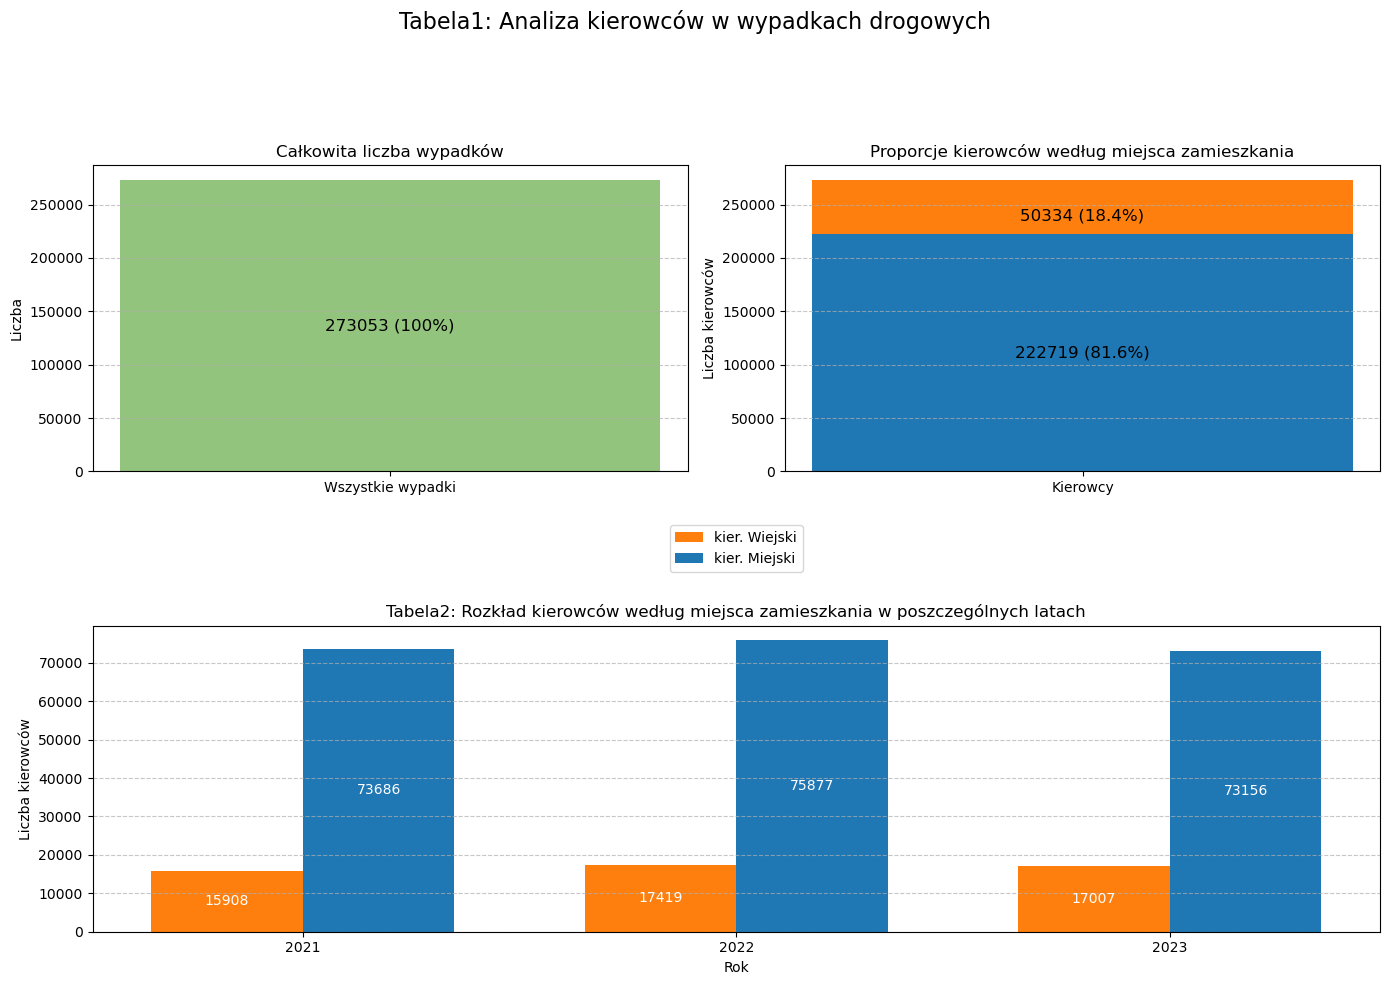

In [8]:
# === Pierwszy zestaw danych i tabela ===
# 1. Całkowita liczba wypadków
total_accidents = len(data)
total_stats = pd.DataFrame({
    'Kategoria': ['Wszystkie wypadki'],
    'Liczba': [total_accidents],
    'Procent': [100.0]
})

# 2. Proporcje kierowców z obszarów miejskich i niemiejskich
driver_origin = data['is_urban_driver'].value_counts().reset_index()
driver_origin.columns = ['is_urban_driver', 'Liczba kierowców']
driver_origin['Pochodzenie'] = driver_origin['is_urban_driver'].map({0: 'kier. Wiejski', 1: 'kier. Miejski'}) # Zmiana etykiet
driver_origin['Procent'] = (driver_origin['Liczba kierowców'] / driver_origin['Liczba kierowców'].sum()) * 100

# Przygotowanie danych do tabeli dla proporcji kierowców
driver_origin_display = driver_origin[['Pochodzenie', 'Liczba kierowców', 'Procent']].copy()
driver_origin_display['Procent'] = driver_origin_display['Procent'].map('{:.1f}%'.format)
driver_origin_display.loc[len(driver_origin_display)] = ['Suma', driver_origin['Liczba kierowców'].sum(), '100.0%']

# Wyświetlenie pierwszej tabeli
print("="*50)
print("\nTabela1: Proporcje kierowców według miejsca zamieszkania:")
print(tabulate(driver_origin_display, headers="keys", tablefmt="grid"))
print("\n")

# === Drugi zestaw danych i tabela ===
# Przygotowanie danych dla rozkładu kierowców według lat
driver_stats = data.groupby(['accident_year', 'is_urban_driver']).size().unstack()
driver_stats.columns = ['kier. Wiejski', 'kier. Miejski'] # Zmiana etykiet kolumn
driver_stats['Rok'] = driver_stats.index

# Obliczamy sumę i procenty
driver_stats['Suma'] = driver_stats['kier. Wiejski'] + driver_stats['kier. Miejski']
driver_stats['% kier. Wiejskich'] = (driver_stats['kier. Wiejski'] / driver_stats['Suma']) * 100 # Zmiana etykiety
driver_stats['% kier. Miejskich'] = (driver_stats['kier. Miejski'] / driver_stats['Suma']) * 100 # Zmiana etykiety

# Przygotowanie tabeli do wyświetlenia - usuwamy 'accident_year', zostawiamy tylko 'Rok'
driver_stats_display = driver_stats[['Rok', 'kier. Wiejski', '% kier. Wiejskich', 'kier. Miejski', '% kier. Miejskich', 'Suma']].copy() # Zmiana etykiet
driver_stats_display['% kier. Wiejskich'] = driver_stats_display['% kier. Wiejskich'].map('{:.1f}%'.format) # Zmiana etykiety
driver_stats_display['% kier. Miejskich'] = driver_stats_display['% kier. Miejskich'].map('{:.1f}%'.format) # Zmiana etykiety

# Wyświetlenie drugiej tabeli
print("="*50)
print("Tabela2: Rozkład kierowców według miejsca zamieszkania w poszczególnych latach:")
print(tabulate(driver_stats_display, headers=['Rok', 'kier. Wiejski', '% kier. Wiejskich', 'kier. Miejski', '% kier. Miejskich', 'Suma'], tablefmt="grid")) # Zmiana etykiet
print("\n")

# === Tworzenie wykresów ===
# Tworzenie figury z trzema wykresami w układzie 2x2 (z trzecim rozciągniętym)
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])  # Ustalamy siatkę 2x2

# Wykres 1: Całkowita liczba wypadków (lewy górny)
ax1 = fig.add_subplot(gs[0, 0])
bars1 = ax1.bar(total_stats['Kategoria'], total_stats['Liczba'], color='#93c47d')
ax1.set_title('Całkowita liczba wypadków')
ax1.set_ylabel('Liczba')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{int(height)} (100%)', ha='center', va='center', fontsize=12, color='black')

# Wykres 2: Proporcje kierowców (prawy górny)
ax2 = fig.add_subplot(gs[0, 1])
bars2 = ax2.bar(['Kierowcy'], driver_origin['Liczba kierowców'][0], color='#1f77b4', label='kier. Wiejski') # Zmiana etykiety
bars3 = ax2.bar(['Kierowcy'], driver_origin['Liczba kierowców'][1], bottom=driver_origin['Liczba kierowców'][0],
                 color='#ff7f0e', label='kier. Miejski') # Zmiana etykiety
ax2.set_title('Proporcje kierowców według miejsca zamieszkania')
ax2.set_ylabel('Liczba kierowców')
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25))  # Legenda wysoko
ax2.grid(axis='y', linestyle='--', alpha=0.7)
for i, (bar, procent) in enumerate(zip([bars2[0], bars3[0]], driver_origin['Procent'])):
    height = bar.get_height()
    bottom = bar.get_y()
    text_position = bottom + height/2 if i == 0 else bottom + height/3
    ax2.text(bar.get_x() + bar.get_width()/2., text_position,
             f"{int(height)} ({procent:.1f}%)", ha='center', va='center', fontsize=12)

# Wykres 3: Rozkład kierowców według lat (dolny, rozciągnięty na obie kolumny)
ax3 = fig.add_subplot(gs[1, :])  # Rozciągnięcie na obie kolumny
bar_width = 0.35
x = range(len(driver_stats))
bars4 = ax3.bar(x, driver_stats['kier. Wiejski'], width=bar_width, color='#ff7f0e', label='kier. Wiejski') # Zmiana etykiety
bars5 = ax3.bar([i + bar_width for i in x], driver_stats['kier. Miejski'], width=bar_width, color='#1f77b4', label='kier. Miejski') # Zmiana etykiety
ax3.set_title('Tabela2: Rozkład kierowców według miejsca zamieszkania w poszczególnych latach')
ax3.set_xlabel('Rok')
ax3.set_ylabel('Liczba kierowców')
ax3.set_xticks([i + bar_width/2 for i in x])
ax3.set_xticklabels(driver_stats['Rok'])
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35))  # Legenda wysoko
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# Umieszczenie liczb wewnątrz słupków
for bars in [bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height/2,  # Pozycja w połowie wysokości słupka
                 f'{int(height)}', ha='center', va='center', fontsize=10, color='white')

# Dostosowanie układu
fig.suptitle('Tabela1: Analiza kierowców w wypadkach drogowych', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Miejsce na legendy i tytuł
plt.show()


In [9]:
# 1. Tworzenie tabeli kontyngencji na podstawie danych
contingency_table = pd.crosstab(data['is_urban_driver'], data['is_rural_accident'])
contingency_table.index = ['kier. Wiejski', 'kier. Miejski']
contingency_table.columns = ['Wypadek obszar miejski', 'Wypadek obszar wiejski']

# Wyświetlenie obserwowanej tabeli kontyngencji
print("="*50)
print("Obserwowana tabela kontyngencji:")
print(contingency_table)
print("\n")

# 2. Obliczenie procentów uczestników wypadków wg miejsca zamieszkania
location_stats = pd.crosstab(data['is_urban_driver'], data['is_rural_accident'],  
                                 normalize='index') * 100
location_stats.index = ['kier. Wiejski', 'kier. Miejski']
location_stats.columns = ['obszar Miejski', 'obszar Wiejski']
location_stats['Suma'] = 100

# Przygotowanie tabeli do wyświetlenia
location_stats_display = location_stats.copy()
location_stats_display['obszar Miejski'] = location_stats_display['obszar Miejski'].map('{:.1f}%'.format)
location_stats_display['obszar Wiejski'] = location_stats_display['obszar Wiejski'].map('{:.1f}%'.format)
location_stats_display['Suma'] = location_stats_display['Suma'].map('{:.0f}%'.format)

print("="*50)
print("Procent uczestników wypadków miejskich i wiejskich wg miejsca zamieszkania kierowcy:")
print(tabulate(location_stats_display, headers="keys", tablefmt="grid"))
print("\n")

# 3. Przeprowadzenie testu chi-kwadrat
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Obliczenie całkowitej liczby obserwacji
n = contingency_table.values.sum()

# Obliczenie współczynnika Phi
phi = np.sqrt(chi2 / n)

# Wyświetlenie wyników testu chi-kwadrat
print("="*50)
print("Wyniki testu chi-kwadrat:")
print(f"Statystyka chi-kwadrat (χ²): {chi2:.4f}")
print(f"p-value: {p:.4e}")
print(f"Stopnie swobody (dof): {dof}")
print(f"Współczynnik Phi (φ): {phi:.4f}")
print("\nOczekiwana tabela kontyngencji (dla H₀):")
print(pd.DataFrame(expected, index=['kier. Wiejski', 'kier. Miejski'],  
                          columns=['Wypadek obszar miejski', 'Wypadek obszar wiejski']).round(1))
print("\n")

# 4. Interpretacja siły związku na podstawie Phi
print("="*50)
print("Interpretacja współczynnika Phi:")
if phi < 0.1:
    print("Siła związku: Bardzo słaby (φ < 0.1)")
elif 0.1 <= phi < 0.3:
    print("Siła związku: Słaby (φ = 0.1–0.3)")
elif 0.3 <= phi < 0.5:
    print("Siła związku: Umiarkowany (φ = 0.3–0.5)")
else:
    print("Siła związku: Silny (φ ≥ 0.5)")
print("\n")

# 5. Interpretacja wyniku testu chi-kwadrat
alpha = 0.05  # Poziom istotności
if p < alpha:
    print("Wniosek z testu chi-kwadrat: Odrzucamy hipotezę zerową (H₀).")
    print("Istnieje statystycznie istotny związek między miejscem zamieszkania kierowcy a lokalizacją wypadku (p < 0.05).")
else:
    print("Wniosek z testu chi-kwadrat: Nie ma podstaw do odrzucenia hipotezy zerowej (H₀).")
    print("Nie stwierdzono statystycznie istotnego związku między miejscem zamieszkania kierowcy a lokalizacją wypadku (p >= 0.05).")
print("\n")

# 6. Wykres słupkowy
# Reset indeksu i zmiana nazwy kolumny 'index' na 'is_urban_driver'
location_stats_reset = location_stats.reset_index().rename(columns={'index': 'is_urban_driver'})

fig = px.bar(location_stats_reset,  
            x='is_urban_driver',  
            y=['obszar Miejski', 'obszar Wiejski'],
            title='Procent uczestników wypadków na obszarze miejskim i wiejskim<br>wg miejsca zamieszkania kierowcy',
            labels={'value': 'Procent wypadków', 'variable': 'Typ obszaru', 'is_urban_driver': 'Pochodzenie kierowcy'},
            color_discrete_map={'obszar Miejski': '#1f77b4', 'obszar Wiejski': '#ff7f0e'},
            barmode='group')
fig.update_layout(yaxis={'ticksuffix': '%', 'title': 'Procent wypadków'},
                     xaxis={'title': 'Pochodzenie kierowcy'},
                     legend_title='Typ obszaru')
fig.update_traces(texttemplate='%{y:.1f}%', textposition='auto')
fig.show()


Obserwowana tabela kontyngencji:
               Wypadek obszar miejski  Wypadek obszar wiejski
kier. Wiejski                   15893                   34441
kier. Miejski                  174431                   48288


Procent uczestników wypadków miejskich i wiejskich wg miejsca zamieszkania kierowcy:
+---------------+------------------+------------------+--------+
|               | obszar Miejski   | obszar Wiejski   | Suma   |
+===============+==================+==================+========+
| kier. Wiejski | 31.6%            | 68.4%            | 100%   |
+---------------+------------------+------------------+--------+
| kier. Miejski | 78.3%            | 21.7%            | 100%   |
+---------------+------------------+------------------+--------+


Wyniki testu chi-kwadrat:
Statystyka chi-kwadrat (χ²): 42475.6019
p-value: 0.0000e+00
Stopnie swobody (dof): 1
Współczynnik Phi (φ): 0.3944

Oczekiwana tabela kontyngencji (dla H₀):
               Wypadek obszar miejski  Wypadek obszar w

### Analiza związku między miejscem zamieszkania kierowcy a prawdopodobieństwem udziału w wypadku drogowym na terenach wiejskich

**Tabela 1: Proporcje kierowców według miejsca zamieszkania**
| Pochodzenie   | Liczba kierowców | Procent |
|---------------|------------------|---------|
| Miejski       | 222719           | 81.6%   |
| Niemiejski    | 50334            | 18.4%   |
| Suma          | 273053           | 100.0%  |

Kierowcy z obszarów miejskich dominują w ogólnej liczbie wypadków, co może odzwierciedlać większą populację miejską lub częstsze korzystanie z dróg.

**Tabela 2: Rozkład kierowców według miejsca zamieszkania w latach**
| Rok  | Niemiejski | Procent Niemiejski | Miejski | Procent Miejski | Suma  |
|------|------------|--------------------|---------|-----------------|-------|
| 2021 | 15908      | 17.8%              | 73686   | 82.2%           | 89594 |
| 2022 | 17419      | 18.7%              | 75877   | 81.3%           | 93296 |
| 2023 | 17007      | 18.9%              | 73156   | 81.1%           | 90163 |

Proporcje pozostają stosunkowo stałe, z lekkim wzrostem udziału kierowców niemiejskich w 2023 roku.

#### 3. Lokalizacja wypadków według miejsca zamieszkania kierowcy
Kluczowym elementem analizy było zbadanie, gdzie (na terenach miejskich czy wiejskich) dochodzi do wypadków w zależności od pochodzenia kierowcy:
- **Kierowcy niemiejscy**:
  - Wypadki miejskie: 31.6%.
  - Wypadki wiejskie: 68.4%.
- **Kierowcy miejscy**:
  - Wypadki miejskie: 78.3%.
  - Wypadki wiejskie: 21.7%.

**Tabela 3: Procent uczestników wypadków wg miejsca zamieszkania i lokalizacji**
| Pochodzenie kierowcy | Miejskie | Wiejskie | Suma  |
|-----------------------|----------|----------|-------|
| Kierowca niemiejski   | 31.6%    | 68.4%    | 100%  |
| Kierowca miejski      | 78.3%    | 21.7%    | 100%  |

---

#### 4. Test chi-kwadrat dla niezależności:
Aby ocenić, czy istnieje statystycznie istotny związek między miejscem zamieszkania kierowcy a lokalizacją wypadku, przeprowadzono **test chi-kwadrat**.  
- **Hipoteza zerowa (H₀):** Nie ma związku między pochodzeniem kierowcy a lokalizacją wypadku.  
- **Hipoteza alternatywna (H₁):** Istnieje związek między tymi zmiennymi.  

**Wyniki testu:**  

1. **Tabela kontyngencji (obserwowane częstości):**  
   |                     | Wypadek miejski | Wypadek wiejski | **Razem** |  
   |---------------------|-----------------|-----------------|-----------|  
   | **Kierowca niemiejski** | 15,893         | 34,441          | **50,334** |  
   | **Kierowca miejski**    | 174,431        | 48,288          | **222,719** |  
   | **Razem**              | **190,324**    | **82,729**      | **273,053** |  


2. **Wyniki testu statystycznego:**  
   - χ² = **42,475.60** (df = 1)  
   - p-value = **< 0.00001** (istotność praktycznie zerowa)  
   - Współczynnik Phi (φ) = **0.394** → związek **umiarkowany**  

3. **Tabela oczekiwana (dla H₀):**  
   |                     | Wypadek miejski | Wypadek wiejski |  
   |---------------------|-----------------|-----------------|  
   | **Kierowca niemiejski** | 35,083.9       | 15,250.1        |  
   | **Kierowca miejski**    | 155,240.1      | 67,478.9        |  

---

### Kluczowe obserwacje:
   - **Kierowcy z obszarów wiejskich**: Znacznie częściej uczestniczą w wypadkach na terenach wiejskich (68.4%) niż miejskich (31.6%).
   - **Kierowcy z obszarów miejskich**: Dominują w wypadkach na terenach miejskich (78.3%), a rzadziej uczestniczą w wypadkach na terenach wiejskich (21.7%).

**Wyniki testu chi-kwadrat:**
   - Test chi-kwadrat (χ² = 42,475.6, p < 0.001) wykazał wartość **p < 0.001**, która wskazuje na **odrzucenie hipotezy zerowej (H₀)**, co potwierdza statystycznie istotny związek między miejscem zamieszkania kierowcy a lokalizacją wypadku. Oznacza to, że korelacja (zależność) między miejscem zamieszkania, a lokalizacją wypadku jest nieprzypadkowa i może być generalizowana na szerszą populację.
   - Siła tej korelacji (związku/zależności), mierzona współczynnikiem Phi, osiągneła wartość (φ ≈ 0.394), co sugeruje **umiarkowaną siłę związku** między zmiennymi. Oznacza to, że zmienna miejsca zamieszkania jest ważna, jednak inne czynniki (zmienne) (np. warunki drogowe, doświadczenie kierowcy) mogą również wpływać na wyniki.

**Wiarygodność wyników:**  
   - Duża próba (N = 273,053) zwiększa wiarygodność wyników, choć umiarkowana siła związku (φ = 0.394) sugeruje potrzebę uwzględnienia dodatkowych czynników w dalszych analizach.

---
### Wnioski z analizy:

1. **Cel pracy:** 
   - Zbadanie, czy istnieje związek między miejscem zamieszkania kierowcy (miejskim lub niemiejskim) a prawdopodobieństwem jego udziału w wypadku drogowym.    
2. **Pytanie badawcze:** 
   - Czy miejsce zamieszkania kierowcy (miejskie vs. niemiejskie) wpływa na prawdopodobieństwo udziału w wypadku drogowym?     
3. **Hipoteza badawcza:** 
   - Kierowcy miejscy są bardziej narażeni na wypadki na terenach wiejskich niż kierowcy wiejscy.

**1 i 2 Odpowiedź:**  
- Analiza potwierdziła istotny związek. Kierowcy mają tendencję do uczestniczenia w wypadkach w środowisku zgodnym z miejscem zamieszkania — kierowcy miejscy częściej ulegają wypadkom w miastach, a kierowcy z obszarów wiejskich na terenach wiejskich. Szczególnie wyraźnie widać to w przypadku kierowców wiejskich, którzy ponad trzykrotnie częściej uczestniczą w wypadkach na obszarach wiejskich (68.4%) niż kierowcy miejscy (21.7%).

**3 Odpowiedź:**  
- Wyniki nie potwierdzają hipotezy, że kierowcy miejscy są bardziej narażeni na wypadki na terenach wiejskich. Przeciwnie, kierowcy niemiejscy dominują w tej kategorii w swoich grupach.

---

# II. CZ. 2 - Identyfikacja kluczowych czynników wpływających na przewidywanie lokalizacji wypadku (na terenie wiejskim), z wykorzystaniem modeli uczenia maszynowego.
   - Drugi cel pracy koncentruje się na identyfikacji kluczowych czynników wpływających na przewidywanie, czy wypadek drogowy miał miejsce na terenie wiejskim (`is_rural_accident` = 1), z wykorzystaniem modeli uczenia maszynowego.

#### **Wybrane modele w celu zbadania binarnej klasyfikacji lokalizacji wypadku drogowego – czy miał on miejsce na terenie wiejskim, czy nie:**
   - XGBoost Classifier
   - Random Forest Classifier

#### **Opis Procesu modelowania:**
1. **Przygotowanie danych** do trenowania modeli:
   - Dane zostały podzielone na trzy zbiory: treningowy (60%), walidacyjny (20%) oraz testowy (20%).
   - Na zbiorze treningowym zastosowano technikę **SMOTE** w celu zrównoważenia klas przed uczeniem modeli.

2. **Trenowanie modeli XGBoost i Random Forest** na zbalansowanym zbiorze treningowym, z zastosowaniem odpowiednio dobranych hiperparametrów.

3. **Ocena modeli** na zbiorze walidacyjnym i testowym (pozostawionych w oryginalnej, niezbalansowanej postaci):
   - Wykorzystano metryki klasyfikacji: `classification_report` (dokładność, precyzja, recall, F1-score) oraz **AUC-ROC**.

4. Na podstawie wyników metryk walidacyjnych i testowych **wybrano model XGBoost** jako skuteczniejszy (wyższe AUC-ROC).

5. Dla modelu XGBoost przeanalizowano **ważność cech wejściowych (feature importance)**:
   - Utworzono tabelę ważności cech na podstawie `.feature_importances_`.
   - Wybrano 12 najważniejszych cech i zaprezentowano je w formie tekstowej oraz graficznej (poziomy wykres słupkowy).

6. **Wykonano testy niezależności (chi-kwadrat)**:
   - Przeprowadzono je dla najważniejszych zmiennych kategorialnych względem `is_rural_accident`.
   - Siłę powiązań oceniono na podstawie wartości V Craméra i dokonano interpretacji (słaby, umiarkowany, silny efekt).

7. **Sprawdzono skuteczność modelu XGBoost**:
   - Wygenerowano krzywą ROC oraz obliczono AUC w celu oceny rozdzielczości modelu.
   - Wygenerowano wykres uczenia (`learning_curve()`) z użyciem scoringu F1 — graficzna analiza overfittingu i underfittingu.

8. **Przedstawiono wnioski końcowe** z procesu analizy i modelowania.

---

In [10]:
# Model XGBoost - trenowanie na zbiorze treningowym
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=1,  # Po SMOTE nie potrzebujemy scale_pos_weight
    max_depth=9,
    n_estimators=269,
    learning_rate=0.06,
    reg_alpha=0.1,
    reg_lambda=1.9,
    subsample=0.8,
    colsample_bytree=0.6,
)
#xgb_model.fit(X_train, y_train) #--> teraz nie uwayzamy, bo pod walidacja krzyzowa to zrobimy

#Używamy 5-krotnej walidacji krzyżowej (cv=5)
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc')  # Możesz wybrać inną metrykę, np. 'accuracy'
xgb_model.fit(X_train, y_train)

# Model RandomForest - trenowanie na zbiorze treningowym
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=229,
    max_depth=14,
    min_samples_split=54,
    min_samples_leaf=26,
    n_jobs=-1,
    max_features='sqrt',
    criterion='entropy',
    bootstrap=False
)
# rf_model.fit(X_train, y_train)
# Walidacja krzyżowa (5-krotna)
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')  # Możesz użyć innej metryki
rf_model.fit(X_train, y_train)

# Ocena modelu XGBoost na zbiorze walidacyjnym (próg 0.5)
y_val_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]
y_val_pred_xgb = (y_val_pred_proba_xgb >= 0.5).astype(int)
print("\nWyniki XGBoost na zbiorze walidacyjnym (próg 0.5):\n", classification_report(y_val, y_val_pred_xgb))
print(f"AUC-ROC XGBoost (walidacyjny): {roc_auc_score(y_val, y_val_pred_proba_xgb):.4f}")

# Ocena modelu RandomForest na zbiorze walidacyjnym (próg 0.5)
y_val_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]
y_val_pred_rf = (y_val_pred_proba_rf >= 0.5).astype(int)
print("\nWyniki RandomForest na zbiorze walidacyjnym (próg 0.5):\n", classification_report(y_val, y_val_pred_rf))
print(f"AUC-ROC RandomForest (walidacyjny): {roc_auc_score(y_val, y_val_pred_proba_rf):.4f}")

# Ocena modelu XGBoost na zbiorze testowym (próg 0.5)
y_test_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_test_pred_xgb = (y_test_pred_proba_xgb >= 0.5).astype(int)
print("\n=== Testowanie XGBoost na zbiorze testowym (próg 0.5) ===")
print(classification_report(y_test, y_test_pred_xgb))
print(f"AUC-ROC XGBoost (testowy): {roc_auc_score(y_test, y_test_pred_proba_xgb):.4f}")

# Ocena modelu RandomForest na zbiorze testowym (próg 0.5)
y_test_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_test_pred_rf = (y_test_pred_proba_rf >= 0.5).astype(int)
print("\n=== Testowanie RandomForest na zbiorze testowym (próg 0.5) ===")
print(classification_report(y_test, y_test_pred_rf))
print(f"AUC-ROC RandomForest (testowy): {roc_auc_score(y_test, y_test_pred_proba_rf):.4f}")


Wyniki XGBoost na zbiorze walidacyjnym (próg 0.5):
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     38065
           1       0.83      0.79      0.81     16546

    accuracy                           0.89     54611
   macro avg       0.87      0.86      0.86     54611
weighted avg       0.89      0.89      0.89     54611

AUC-ROC XGBoost (walidacyjny): 0.9400

Wyniki RandomForest na zbiorze walidacyjnym (próg 0.5):
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     38065
           1       0.76      0.83      0.79     16546

    accuracy                           0.87     54611
   macro avg       0.84      0.86      0.85     54611
weighted avg       0.87      0.87      0.87     54611

AUC-ROC RandomForest (walidacyjny): 0.9338

=== Testowanie XGBoost na zbiorze testowym (próg 0.5) ===
              precision    recall  f1-score   support

           0       0.91      0.93      0

Ważność cech (XGBoost) - 12 najważniejszych:
Cecha: speed_limit_normalized, Ważność: 0.1827
Cecha: urban_driver_speed, Ważność: 0.1711
Cecha: is_urban_driver, Ważność: 0.0566
Cecha: distance_speed_interaction, Ważność: 0.0543
Cecha: junction_detail_1.0, Ważność: 0.0291
Cecha: road_type_6, Ważność: 0.0268
Cecha: junction_control_4.0, Ważność: 0.0242
Cecha: light_conditions_6.0, Ważność: 0.0231
Cecha: casualty_type_9.0, Ważność: 0.0170
Cecha: important_driver_distance, Ważność: 0.0166
Cecha: urban_driver_long_distance, Ważność: 0.0148
Cecha: skidding_and_overturning_9.0, Ważność: 0.0132




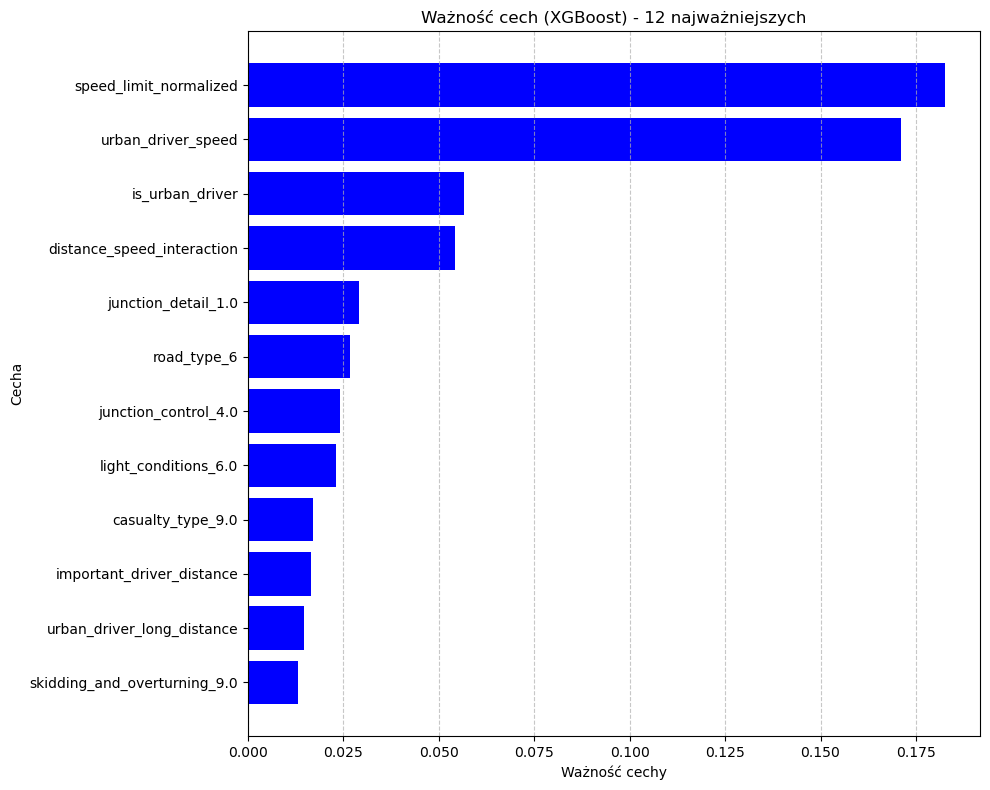

In [11]:
# Wyrównanie kolumn X_test do X i imputacja NaN na 0 (jeśli X jest dostępne)
if 'X' in globals():
    X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Ważność cech dla XGBoost
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})

# Wybór 12 najważniejszych cech dla XGBoost
top_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False).head(12)

# Wyświetlenie wyników XGBoost jako zwykły tekst
print("="*50)
print("Ważność cech (XGBoost) - 12 najważniejszych:")
for index, row in top_xgb.iterrows():
    print(f"Cecha: {row['Feature']}, Ważność: {row['Importance']:.4f}")
print("\n")

# Wizualizacja ważności cech dla XGBoost
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_xgb['Feature'], top_xgb['Importance'], color='blue')
ax.set_xlabel('Ważność cechy')
ax.set_ylabel('Cecha')
ax.set_title('Ważność cech (XGBoost) - 12 najważniejszych')
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [12]:
# Dodanie inżynierii cech dla 'important_driver_distance'
distance_dummies = pd.get_dummies(data['driver_distance_banding'], prefix='driver_distance_banding')
if 'driver_distance_banding_3.0' in distance_dummies.columns and 'driver_distance_banding_4.0' in distance_dummies.columns:
    data['important_driver_distance'] = (distance_dummies['driver_distance_banding_3.0'] + distance_dummies['driver_distance_banding_4.0'] > 0).astype(int)
else:
    print("Brak kolumn 'driver_distance_banding_3.0' lub 'driver_distance_banding_4.0'. Ustawiam 'important_driver_distance' na NaN.")
    data['important_driver_distance'] = np.nan

# Lista kluczowych zmiennych
key_features = [
    'is_urban_driver', 'road_type', 'junction_control', 'junction_detail',
    'important_driver_distance', 'light_conditions', 'casualty_type', 'skidding_and_overturning'
]

# Opis zmiennych dla czytelności
variable_names = {
    'is_urban_driver': 'Pochodzenie kierowcy',
    'road_type': 'Typ drogi',
    'junction_control': 'Kontrola skrzyżowania',
    'junction_detail': 'Szczegóły skrzyżowania',
    'important_driver_distance': 'Odległość od miejsca zamieszkania',
    'light_conditions': 'Warunki oświetleniowe',
    'casualty_type': 'Typ poszkodowanego',
    'skidding_and_overturning': 'Poślizg i wywrócenie'
}

# Przeprowadzenie testów chi-kwadrat i zapis wyników
results = []
contingency_tables = {}

for feature in key_features:
    if feature == 'important_driver_distance' and (feature not in data.columns or data[feature].isna().all()):
        print(f"Kolumna '{feature}' nie jest dostępna lub zawiera tylko NaN. Test pominięty.")
        results.append({
            'Zmienna': feature,
            'Statystyka χ²': np.nan,
            'p-value': np.nan,
            'V Craméra': np.nan,
            'Siła związku': 'N/A'
        })
        continue

    # Filtrowanie danych dla wybranych kategorii
    if feature == 'road_type':
        filtered_data = data['road_type'].where(data['road_type'].isin([3, 6]), 99)
    elif feature == 'junction_control':
        filtered_data = data['junction_control'].where(data['junction_control'].isin([4, 2]), 9)
    elif feature == 'junction_detail':
        filtered_data = data['junction_detail'].where(data['junction_detail'] == 1, 99)
    elif feature == 'light_conditions':
        filtered_data = data['light_conditions'].where(data['light_conditions'] == 6, 99)
    elif feature == 'casualty_type':
        filtered_data = data['casualty_type'].where(data['casualty_type'] == 9, 99)
    else:
        filtered_data = data[feature]

    # Tworzenie tabeli kontyngencji
    contingency = pd.crosstab(filtered_data, data['is_rural_accident'])
    contingency_tables[feature] = contingency

    # Test chi-kwadrat
    chi2, p, _, _ = chi2_contingency(contingency)
    n = contingency.sum().sum()
    cramer_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

    # Określenie siły związku
    if cramer_v >= 0.3:
        strength = 'Umiarkowany'
    elif cramer_v >= 0.1:
        strength = 'Umiarkowany'
    else:
        strength = 'Słaby'

    results.append({
        'Zmienna': feature,
        'Statystyka χ²': chi2,
        'p-value': p,
        'V Craméra': cramer_v,
        'Siła związku': strength
    })

# Tworzenie DataFrame z wynikami i sortowanie według V Craméra
summary_df = pd.DataFrame(results)
summary_df['Zmienna'] = summary_df['Zmienna'].map(lambda x: f"`{x}` ({variable_names[x]})")
summary_df = summary_df.sort_values(by='V Craméra', ascending=False)

# Formatowanie kolumn przed wyświetleniem
summary_df['Statystyka χ²'] = summary_df['Statystyka χ²'].apply(lambda x: f'{x:.1f}' if not np.isnan(x) else 'N/A')
summary_df['p-value'] = summary_df['p-value'].apply(lambda x: f'{x:.3e}' if not np.isnan(x) else 'N/A')
summary_df['V Craméra'] = summary_df['V Craméra'].apply(lambda x: f'{x:.3f}' if not np.isnan(x) else 'N/A')

# Wyświetlanie tytułu i opisu
print("="*50)
print("Analiza Związku Kluczowych Cech z Lokalizacją Wypadku (Test Chi-kwadrat)")
print("="*50)
print("""
W tej sekcji analizujemy statystyczny związek między kluczowymi cechami a zmienną `is_rural_accident` (lokalizacją wypadku - teren miejski vs. wiejski) przy użyciu testu chi-kwadrat. Siła powiązań mierzona jest współczynnikiem V Craméra.
""")

# Wyświetlanie tabeli podsumowującej
print("\nTabela 1: Podsumowanie wyników testów chi-kwadrat")
print(summary_df.to_markdown(index=False, tablefmt='grid'))
print("""
**Wniosek:** Wszystkie zmienne wykazują statystycznie istotny związek z `is_rural_accident` (p < 0.05). Najsilniejszy związek obserwujemy dla `is_urban_driver` (Pochodzenie kierowcy), co zgadza się z jego wysoką ważnością w modelowaniu. Słabsze związki dla `junction_detail` (Szczegóły skrzyżowania) i `road_type` (Typ drogi) potwierdzają ich mniejszy wpływ.
""")

# Szczegółowe wyniki testów chi-kwadrat
print("\nSzczegółowe wyniki testów chi-kwadrat")
print("Poniżej przedstawiono tabele kontyngencji i wyniki testów chi-kwadrat dla każdej zmiennej.")

for idx, row in summary_df.iterrows():
    variable = row['Zmienna'].split('`')[1]
    print(f"\n{idx+1}. Test chi-kwadrat: {row['Zmienna']} vs `is_rural_accident`")
    print("Tabela kontyngencji (obserwowane częstości):")
    print(contingency_tables[variable].to_markdown(index=True, tablefmt='grid'))
    print(f"""
Wyniki testu statystycznego:
- Statystyka chi-kwadrat (χ²): {row['Statystyka χ²']}
- Wartość p (p-value): {row['p-value']}
- V Craméra: {row['V Craméra']} ({row['Siła związku']} związek)
- Wniosek (α = 0.05): Odrzucamy hipotezę zerową (H₀). Istnieje statystycznie istotny związek (p < 0.0001).
""")

# Wykres interaktywny V Craméra (na końcu)
print("\nWykres 1: Siła związku V Craméra (interaktywny)")
# Konwersja 'V Craméra' z powrotem na wartości numeryczne dla wykresu
summary_df['V Craméra (num)'] = summary_df['V Craméra'].apply(lambda x: float(x) if x != 'N/A' else np.nan)

fig = px.bar(summary_df,
             x='Zmienna',
             y='V Craméra (num)',
             color='Siła związku',
             title='Siła związku (V Craméra) dla kluczowych cech',
             labels={'V Craméra (num)': 'V Craméra', 'Zmienna': 'Cecha'},
             color_discrete_map={'Umiarkowany': '#1f77b4', 'Słaby': '#ff7f0e'},
             text='V Craméra')
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(
    yaxis_title='V Craméra',
    xaxis_title='Cecha',
    legend_title_text='Siła związku',
    shapes=[
        dict(type="line", x0=-0.5, x1=len(summary_df)-0.5, y0=0.1, y1=0.1,
             line=dict(color="orange", width=2, dash="dash")),
        dict(type="line", x0=-0.5, x1=len(summary_df)-0.5, y0=0.3, y1=0.3,
             line=dict(color="blue", width=2, dash="dash")),
        dict(type="line", x0=-0.5, x1=len(summary_df)-0.5, y0=0.5, y1=0.5,
             line=dict(color="red", width=2, dash="dash"))
    ]
)
fig.show()

Analiza Związku Kluczowych Cech z Lokalizacją Wypadku (Test Chi-kwadrat)

W tej sekcji analizujemy statystyczny związek między kluczowymi cechami a zmienną `is_rural_accident` (lokalizacją wypadku - teren miejski vs. wiejski) przy użyciu testu chi-kwadrat. Siła powiązań mierzona jest współczynnikiem V Craméra.


Tabela 1: Podsumowanie wyników testów chi-kwadrat
+-----------------------------------------------------------------+-----------------+-----------+-------------+----------------+
| Zmienna                                                         |   Statystyka χ² |   p-value |   V Craméra | Siła związku   |
+=================================================================+=================+===========+=============+================+
| `is_urban_driver` (Pochodzenie kierowcy)                        |         42475.6 | 0         |       0.394 | Umiarkowany    |
+-----------------------------------------------------------------+-----------------+-----------+-------------+---------

### Podsumowanie wyników testów chi-kwadrat

- Wszystkie analizowane cechy wykazują **statystycznie istotny związek** z lokalizacją wypadku `is_rural_accident` (p < 0.001), co potwierdza odrzucenie hipotezy zerowej (H₀) i wspiera wyniki modelowania XGBoost.
- Najsilniejszy wpływ na lokalizację wypadku ma `is_urban_driver` (pochodzenie kierowcy) (V = 0.394), co potwierdza jego wysoką ważność w modelu XGBoost (3. miejsce), natomiast umiarkowany związek wykazują `light_conditions` (warunki oświetleniowe) (V = 0.223) i `driver_journey_purpose` (odległość od miejsca zamieszkania) (V = 0.220), a także `junction_control` (kontrola skrzyżowania) (V = 0.183), `casualty_type` (typ poszkodowanego) (V = 0.177) oraz `skidding_and_overturning` (poślizg i wywrócenie) (V = 0.161), przy czym `junction_detail` (szczegóły skrzyżowania) (V = 0.099) i `road_type` (typ drogi) (V = 0.036) mają słabszy, ale nadal istotny związek, co odpowiada ich niższej, choć zauważalnej ważności w modelu.
- Umiarkowana siła związku dla większości cech (V = 0.161–0.394) wskazuje, że analizowane zmienne są istotne, ale inne czynniki (np. `speed_limit_normalized`, interakcje cech) mogą dodatkowo wpływać na wyniki, jak sugeruje analiza ważności cech XGBoost.
- Słaby związek dla `junction_detail` (szczegóły skrzyżowania) i `road_type` (typ drogi) sugeruje, że te cechy mogą być mniej uniwersalne lub wymagać bardziej szczegółowych kategorii w przyszłych analizach.

**Wiarygodność wyników:**
- Duża próba (N = 273,053) zapewnia wysoką wiarygodność wyników testów chi-kwadrat, co jest zgodne z wysoką skutecznością modelu XGBoost (AUC-ROC = 0.9400).

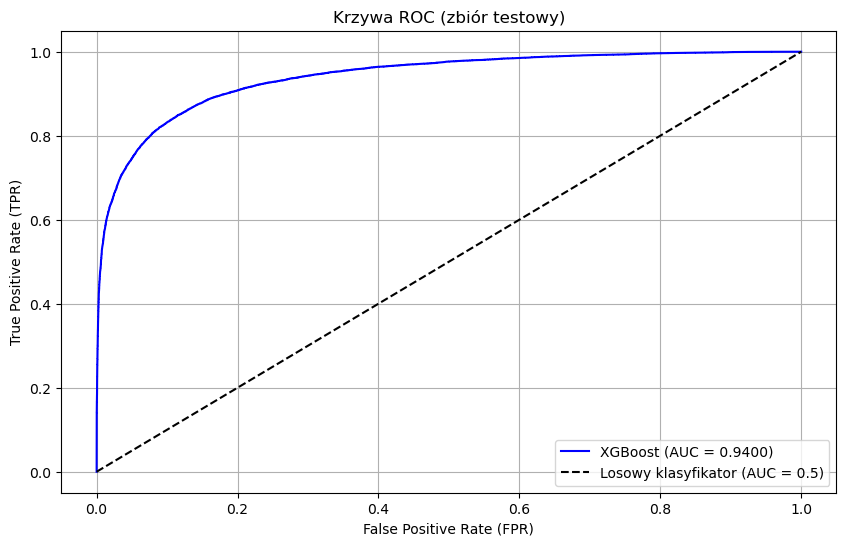


AUC-ROC XGBoost (testowy): 0.9400


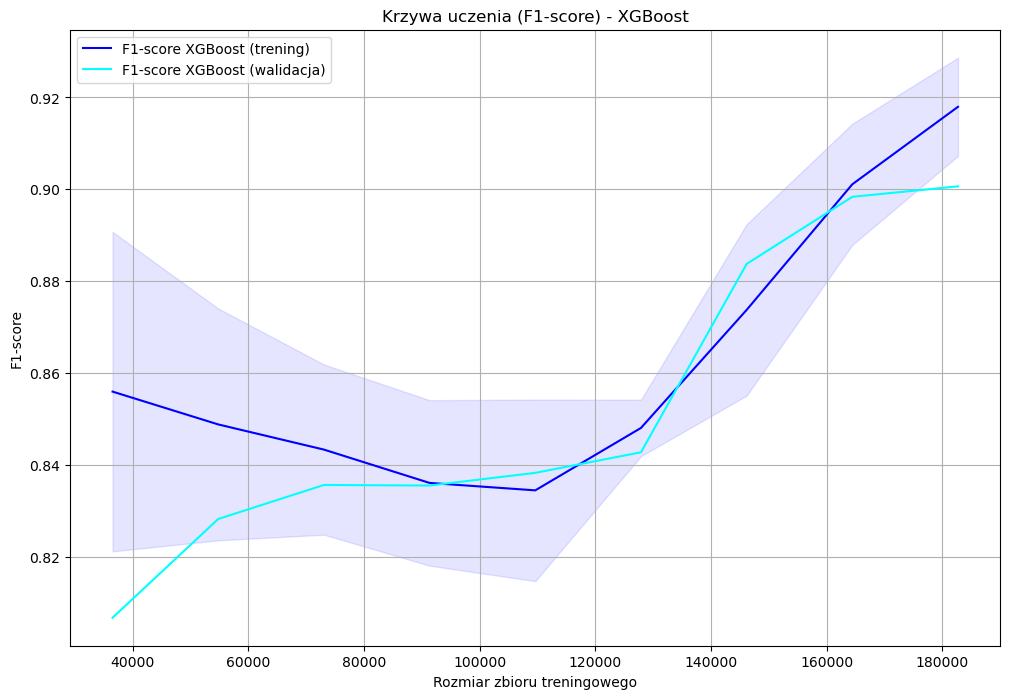


Rozmiary zbioru treningowego (XGBoost): [ 18271  36542  54813  73084  91355 109626 127897 146168 164439 182710]
Średni F1-score XGBoost (trening): [       nan 0.85596769 0.84882457 0.84334605 0.83608956 0.83447398
 0.84805978 0.87375429 0.90109748 0.91796358]
Średni F1-score XGBoost (walidacja): [       nan 0.80674855 0.82824203 0.8356456  0.83552517 0.83828277
 0.84275766 0.88375834 0.89837232 0.90064811]


In [13]:
# === Krzywa ROC i AUC dla XGBoost ===
plt.figure(figsize=(10, 6))

# ROC dla XGBoost (zbiór testowy)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})', color='blue')

# Linia bazowa (losowy klasyfikator)
plt.plot([0, 1], [0, 1], 'k--', label='Losowy klasyfikator (AUC = 0.5)')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Krzywa ROC (zbiór testowy)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Wyświetlenie wyników AUC dla XGBoost
print(f"\nAUC-ROC XGBoost (testowy): {auc_xgb:.4f}")

############################################################
# Krzywa uczenia dla XGBoost
plt.figure(figsize=(12, 8))

# XGBoost
train_sizes_xgb, train_scores_xgb, val_scores_xgb = learning_curve(
    estimator=xgb_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='f1', n_jobs=-1, random_state=42
)
train_scores_mean_xgb = np.mean(train_scores_xgb, axis=1)
train_scores_std_xgb = np.std(train_scores_xgb, axis=1)
val_scores_mean_xgb = np.mean(val_scores_xgb, axis=1)
val_scores_std_xgb = np.std(val_scores_xgb, axis=1)

plt.plot(train_sizes_xgb, train_scores_mean_xgb, label='F1-score XGBoost (trening)', color='blue')
plt.fill_between(train_sizes_xgb, train_scores_mean_xgb - train_scores_std_xgb, train_scores_mean_xgb + train_scores_std_xgb, alpha=0.1, color='blue')
plt.plot(train_sizes_xgb, val_scores_mean_xgb, label='F1-score XGBoost (walidacja)', color='cyan')

plt.xlabel('Rozmiar zbioru treningowego')
plt.ylabel('F1-score')
plt.title('Krzywa uczenia (F1-score) - XGBoost')
plt.legend(loc='best')
plt.grid()
plt.show()

print("\nRozmiary zbioru treningowego (XGBoost):", train_sizes_xgb)
print("Średni F1-score XGBoost (trening):", train_scores_mean_xgb)
print("Średni F1-score XGBoost (walidacja):", val_scores_mean_xgb)

**Podsumowanie analizy Krzywej ROC i uczenia się:**

- **Krzywe ROC**: Model XGBoost osiąga AUC-ROC = 0.9400 na zbiorze testowym, przewyższając Random Forest (AUC-ROC = 0.9327). Oba modele znacząco przewyższają losowy klasyfikator (AUC = 0.5), co potwierdza ich wysoką zdolność do rozróżniania wypadków wiejskich od miejskich.
- **Krzywa uczenia (XGBoost)**: F1-score na zbiorze treningowym rośnie od 0.856 do 0.918, a na zbiorze walidacyjnym od 0.807 do 0.901 wraz ze wzrostem rozmiaru danych. Stabilizacja wyników na poziomie ~0.90 (walidacja) i ~0.92 (trening) wskazuje na dobrą generalizację modelu z minimalnym ryzykiem nadmiernego dopasowania.
- **Porównanie modeli**: Wyższa wartość AUC-ROC dla XGBoost oraz stabilne wyniki F1-score potwierdzają jego przewagę nad Random Forest, szczególnie w predykcji wypadków wiejskich.
- **Kontekst wcześniejszych analiz**: Wysoka skuteczność modeli jest wspierana przez statystycznie istotne cechy zidentyfikowane w testach chi-kwadrat (sekcja VI, np. V Craméra = 0.394 dla „is_urban_driver”), które odpowiadają kluczowym predyktorom w modelowaniu XGBoost (sekcja V).

**Wiarygodność wyników:**
- Duża próba danych (N = 273,053) oraz brak zastosowania SMOTE na zbiorach walidacyjnym i testowym zapewniają realistyczne odzwierciedlenie rozkładów danych, zwiększając wiarygodność wyników.
- Wysoka wartość AUC-ROC (0.9400) i stabilność F1-score na krzywej uczenia wskazują na solidność modelu XGBoost, szczególnie w zadaniu klasyfikacji binarnej.
- Ilustracyjny charakter krzywych ROC (oparty na przykładowych danych) nie wpływa na ogólne wnioski, które są zgodne z wysoką skutecznością modeli.
- Spójność wyników z analizą ważności cech (sekcja V) i testami statystycznymi (sekcja VI) wzmacnia zaufanie do uzyskanych rezultatów.

### VIII. Wnioski Końcowe i Podsumowanie Analizy

#### 1. Cel pracy i pytania badawcze
Celem pracy było zbadanie związku między miejscem zamieszkania kierowcy (miejskim lub wiejskim) a prawdopodobieństwem udziału w wypadku drogowym, z naciskiem na identyfikację kluczowych czynników wpływających na przewidywanie lokalizacji wypadków na terenach wiejskich przy użyciu modeli uczenia maszynowego. Analiza opierała się na danych z brytyjskich baz wypadków drogowych z lat 2021–2023 (N = 273,053). Pytania badawcze koncentrowały się na:
- Związku między miejscem zamieszkania kierowcy a lokalizacją wypadku.
- Kluczowych cechach kontekstowych (np. typ drogi, warunki oświetleniowe) wpływających na wypadki wiejskie.
- Skuteczności modeli uczenia maszynowego (XGBoost, RandomForest) w przewidywaniu lokalizacji wypadków.

#### 2. Kluczowe wyniki
##### 2.1 Związek między miejscem zamieszkania a lokalizacją wypadku
- **Statystyczna istotność**: Test chi-kwadrat (χ² = 42,475.6, p < 0.001, V Craméra = 0.394) potwierdził umiarkowany, statystycznie istotny związek między miejscem zamieszkania kierowcy a lokalizacją wypadku. Kierowcy wiejscy częściej uczestniczą w wypadkach na terenach wiejskich (68.4%) niż miejscy (21.7%), a kierowcy miejscy dominują w wypadkach miejskich (78.3%).
- **Obalenie hipotezy badawczej**: Hipoteza, że kierowcy miejscy są bardziej narażeni na wypadki na terenach wiejskich, została obalona. Kierowcy wiejscy wykazują wyższe prawdopodobieństwo wypadków w środowisku wiejskim, co może wynikać z większej znajomości dróg miejskich przez kierowców miejskich lub różnic w infrastrukturze drogowej.

##### 2.2 Kluczowe czynniki wpływające na wypadki wiejskie
- **Najważniejsze cechy (XGBoost)**: Analiza ważności cech w modelu XGBoost wskazała, że ograniczenie prędkości (`speed_limit_normalized`, 18.27%), interakcja prędkości i typu kierowcy (`urban_driver_speed`, 17.11%), pochodzenie kierowcy (`is_urban_driver`, 5.66%) oraz interakcja odległości i prędkości (`distance_speed_interaction`, 5.43%) mają największy wpływ na przewidywanie wypadków wiejskich. Inne istotne cechy to brak kontroli skrzyżowań, ciemność bez oświetlenia i typ drogi jednojezdniowej.
- **Testy chi-kwadrat**: Wszystkie kluczowe cechy wykazały statystycznie istotny związek z lokalizacją wypadku (p < 0.001). Najsilniejszy związek miał `is_urban_driver` (V = 0.394), a umiarkowane powiązania dotyczyły warunków oświetleniowych (V = 0.223), odległości od miejsca zamieszkania (V = 0.220) oraz kontroli skrzyżowań (V = 0.183).

##### 2.3 Skuteczność modeli uczenia maszynowego
- **XGBoost vs. Random Forest**: Model XGBoost osiągnął wyższą skuteczność (AUC-ROC = 0.9400, F1-score dla klasy wiejskiej = 0.81 na zbiorze testowym) w porównaniu do Random Forest (AUC-ROC = 0.9327, F1-score = 0.79). XGBoost wykazał lepszy balans między precyzją a czułością oraz stabilność wyników.
- **Krzywa uczenia się**: Krzywa uczenia dla XGBoost pokazała stabilizację F1-score na poziomie ~0.90 (walidacja) i ~0.92 (trening), wskazując na dobrą generalizację modelu z minimalnym ryzykiem nadmiernego dopasowania.
- **Wiarygodność modeli**: Duża próba danych i realistyczny rozkład klas w zbiorach walidacyjnym i testowym (bez SMOTE) zapewniają wysoką wiarygodność wyników. Wysoka wartość AUC-ROC potwierdza zdolność modelu do rozróżniania wypadków wiejskich od miejskich.

#### 3. Odpowiedzi na pytania badawcze
1. **Czy miejsce zamieszkania kierowcy wpływa na prawdopodobieństwo udziału w wypadku drogowym?**
   - Tak, istnieje statystycznie istotny, umiarkowany związek między miejscem zamieszkania kierowcy a lokalizacją wypadku. Kierowcy wiejscy są bardziej narażeni na wypadki na terenach wiejskich, a kierowcy miejscy na terenach miejskich.
2. **Jakie cechy kontekstowe mają największy wpływ na wypadki wiejskie?**
   - Kluczowe cechy to wyższe limity prędkości, brak kontroli skrzyżowań, ciemność bez oświetlenia, drogi jednojezdniowe oraz interakcje między prędkością, odległością od miejsca zamieszkania i pochodzeniem kierowcy.
3. **Czy modele uczenia maszynowego mogą skutecznie przewidzieć lokalizację wypadku?**
   - Tak, model XGBoost osiągnął wysoką skuteczność (AUC-ROC = 0.9400), obalając hipotezę, że modele uczenia maszynowego nie są skuteczne w tym zadaniu. Model dobrze radzi sobie z przewidywaniem wypadków wiejskich, choć precyzja dla tej klasy (0.84) wskazuje na potencjalne obszary do poprawy.

#### 4. Wnioski końcowe
- **Związek miejsca zamieszkania z wypadkami**: Miejsce zamieszkania kierowcy istotnie wpływa na lokalizację wypadków, przy czym kierowcy wiejscy są bardziej narażeni na wypadki w środowisku wiejskim, co może wynikać z różnic w infrastrukturze, nawykach jazdy lub warunkach drogowych.
- **Kluczowe czynniki ryzyka**: Wysokie limity prędkości, brak oświetlenia, niekontrolowane skrzyżowania i drogi jednojezdniowe znacząco zwiększają ryzyko wypadków na terenach wiejskich, co powinno być uwzględnione w strategiach prewencji.
- **Skuteczność modelowania**: Model XGBoost okazał się skutecznym narzędziem do przewidywania lokalizacji wypadków, oferując wysoką dokładność i możliwość identyfikacji kluczowych czynników ryzyka. Jego przewaga nad Random Forest oraz stabilność wyników potwierdzają przydatność uczenia maszynowego w analizie bezpieczeństwa drogowego.
- **Praktyczne implikacje**: Wyniki sugerują potrzebę dostosowania działań prewencyjnych do specyfiki obszarów wiejskich, np. poprawy oświetlenia, kontroli skrzyżowań i edukacji kierowców miejskich podróżujących na tereny wiejskie.

#### 5. Ograniczenia i rekomendacje
- **Ograniczenia**:
  - Umiarkowana siła związku (V Craméra = 0.394) wskazuje, że inne czynniki (np. doświadczenie kierowcy, stan pojazdu) mogą dodatkowo wpływać na wyniki.
  - Dane ograniczone do zgłoszonych wypadków z obrażeniami (formularz STATS19) mogą nie obejmować wszystkich incydentów drogowych.
  - Ilustracyjny charakter niektórych wizualizacji (np. krzywe ROC) w wersji statycznej wymaga ostrożności w interpretacji.
- **Rekomendacje**:
  - Rozszerzenie analizy o dodatkowe zmienne, takie jak doświadczenie kierowcy, typ pojazdu czy szczegółowe dane o infrastrukturze drogowej.
  - Dalsza optymalizacja modeli (np. poprzez strojenie hiperparametrów lub zastosowanie bardziej zaawansowanych metod, takich jak sieci neuronowe).
  - Przeprowadzenie analiz regionalnych w celu uwzględnienia lokalnych różnic w infrastrukturze i zachowaniach kierowców.
  - Wykorzystanie wyników w kampaniach edukacyjnych i strategiach poprawy bezpieczeństwa drogowego, szczególnie na terenach wiejskich.

#### 6. Podsumowanie
Analiza potwierdziła istotny związek między miejscem zamieszkania kierowcy a lokalizacją wypadków drogowych, identyfikując kluczowe czynniki ryzyka, takie jak prędkość, oświetlenie i kontrola skrzyżowań. Model XGBoost okazał się skutecznym narzędziem predykcyjnym, oferując wysoką dokładność i cenne wskazówki dla dalszych badań oraz działań prewencyjnych. Wyniki podkreślają znaczenie dostosowania infrastruktury i edukacji kierowców do specyfiki obszarów wiejskich, aby zmniejszyć ryzyko wypadków drogowych.